# 필요 라이브러리 목록

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


# 1. 데이터 소개 및 Excel 파일 Import

In [106]:
IR_DataSet = pd.read_csv(
            "Enter your dataset path",
            thousands = ',',
            encoding = 'euc-kr')

df = pd.DataFrame(IR_DataSet)
df

,idx,lineCode,processCode,hogi,barcodeName,operator,butNum,inspDate,inspTime,result,...,2_2_Volt_resMeasure,2_2_Result,3_1_TestStart,3_1_Result,3_2_Volt_resMeasure,3_2_Result,4_1_TestStart,4_1_Result,4_2_Volt_resMeasure,4_2_Result
0,1396224,B1,IR,1,MFR01089AB:2102263545V,223635,1,2021-12-18,07:16:18,FAIL,...,"0.003[kV], 0[Ω]",F,0,SKIP,0,SKIP,0,SKIP,0,SKIP
1,292864,B1,IR,1,MFR01089AB:2102263545V,223635,1,2021-12-09,07:13:07,FAIL,...,"0.003[kV], 0[Ω]",F,0,SKIP,0,SKIP,0,SKIP,0,SKIP
2,103424,B1,IR,1,MFR01089AB:2102263545V,223635,1,2021-12-11,07:12:38,FAIL,...,"0.003[kV], 0[Ω]",F,0,SKIP,0,SKIP,0,SKIP,0,SKIP
3,1177856,B1,IR,1,MFR01089AB:2102263545V,223635,1,2021-12-14,07:14:33,FAIL,...,"0.003[kV], 0[Ω]",F,0,SKIP,0,SKIP,0,SKIP,0,SKIP
4,398337,B1,IR,1,MFR01089AB:2102263545V,223635,1,2021-12-10,07:13:35,FAIL,...,"0.003[kV], 0[Ω]",F,0,SKIP,0,SKIP,0,SKIP,0,SKIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1720576,B1,IR,1,MFR01089AB;2112233774V,223635,1,2021-12-23,16:09:55,PASS,...,"0.502[kV], 40700000000[Ω]",P,0,SKIP,0,SKIP,0,SKIP,0,SKIP
1496,1917184,B1,IR,1,MFR01089AB;2112164536V,223635,1,2021-12-16,18:51:08,PASS,...,"0.5[kV], 37500000000[Ω]",P,0,SKIP,0,SKIP,0,SKIP,0,SKIP
1497,2113792,B1,IR,1,MFR01089AB;2112100686V,223635,1,2021-12-10,02:52:02,PASS,...,"0.5[kV], 46150000000[Ω]",P,0,SKIP,0,SKIP,0,SKIP,0,SKIP
1498,2244864,B1,IR,1,MFR01089AB;2112230339V,223635,1,2021-12-23,01:44:40,PASS,...,"0.5[kV], 38960000000[Ω]",P,0,SKIP,0,SKIP,0,SKIP,0,SKIP


# 2. 데이터 전처리

### 2-1. Outlier 제거

In [ ]:
df = df.dropna()
spac = df[df['2_2_Volt_resMeasure'].str.contains('E37')].index
df.drop(spac, inplace=True)

### 2-2. 샘플 데이터 수 증가

In [ ]:
for i in range(8):
    df = pd.concat([df, df])

df

### 2-3. 결측값 체크

In [ ]:
df.isna().sum()

### 2-4. 결측값 제거(결측값 존재 시)

In [ ]:
df = df.dropna()
df

In [ ]:
df.columns

### 2-5. 시계열 데이터 생성을 위한 Sorting

In [ ]:
df = df.sort_values(by=['inspDate', 'inspTime'], axis=0)
# df = df.sort_values(by=['inspDate'], axis=0)
df.reset_index(inplace=True, drop=True)
df

### 2-6. 양 / 불 데이터 비율 확인

In [ ]:
IROKNG = df.groupby('2_2_Result').hogi.sum()
IROKNG

### 2-7. 2_2_Volt_resMeasure 컬럼 분리 -> 전류, 전압

In [ ]:
import math
    
tempArray3 = df['2_2_Volt_resMeasure'].str.split(',').str[0]

for i in range(len(tempArray3)) :
    tempArray3[i] = float(tempArray3[i].replace('[kV]', ''))
    
tempArray4 = df['2_2_Volt_resMeasure'].str.split(',').str[1]

for i in range(len(tempArray4)) :
    tempArray4[i] = float(tempArray4[i].replace('[Ω]', ''))

df['IR_volt'] = tempArray3
df['IR_resMeasure'] = tempArray4

# pd.set_option('display.max_rows', None)
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 20

df[['2_2_Volt_resMeasure', 'IR_volt', 'IR_resMeasure']]

# 3. 데이터 구조 파악

### 3-1. 사분위간 범위 체크 시각화

In [ ]:
df = df.astype({'IR_resMeasure':'float'})

df['IR_resMeasure'].describe()

In [ ]:
df.info()
df.shape

In [ ]:
sns.boxplot(x = 'lineCode', y = 'IR_resMeasure', data = df, palette = 'Spectral', linewidth = 3, width = 0.5)

# plt.xticks(range(2), ['OK', 'NG'])
# plt.show()

### 3-2. 시계열 데이터 패턴 확인

In [ ]:
# import matplotlib
# matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(df['IR_resMeasure'])

In [ ]:
plt.plot(df['IR_volt'])

# 4. 모델링

In [84]:
sec = []
sec_num = 0

for i in range(len(df)):
    sec_num += 1
    sec.append(sec_num)
    if sec_num == 1024: ## 값 변경
        sec_num = 0
    else:
        sec_num = sec_num

In [85]:
df['sec'] = sec

In [86]:
X = df['sec']
Y = df['IR_resMeasure']

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0, shuffle=False)
X_train = X_train.values
X_test = X_test.values

Y_train = Y_train.values
Y_test = Y_test.values

X_train = X_train.reshape(X_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)

In [88]:
## 예측, 분류 정확도를 판단하기위한 RMSE 수치 

rmse_val = []
for K in range(17):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights = 'distance')
    
    model.fit(X_train, Y_train)
    pred=model.predict(X_test)
    error=sqrt(mean_squared_error(Y_test, pred))
    rmse_val.append(error)
    print('RMSE value for K = ', K, 'is : ', error)

RMSE value for K =  1 is :  24660621560.478336
RMSE value for K =  2 is :  24984729644.52392
RMSE value for K =  3 is :  24902663587.137646
RMSE value for K =  4 is :  24795568275.87354
RMSE value for K =  5 is :  24522817199.897495
RMSE value for K =  6 is :  24275638502.946648
RMSE value for K =  7 is :  24079601985.412262
RMSE value for K =  8 is :  23365460159.49133
RMSE value for K =  9 is :  21801028031.13158
RMSE value for K =  10 is :  20963496286.833786
RMSE value for K =  11 is :  20587282384.602337
RMSE value for K =  12 is :  20477925100.664703
RMSE value for K =  13 is :  20522447798.47468
RMSE value for K =  14 is :  20640667528.955944
RMSE value for K =  15 is :  20598440609.985477
RMSE value for K =  16 is :  20487187934.433147
RMSE value for K =  17 is :  20394979689.18106


<AxesSubplot:>

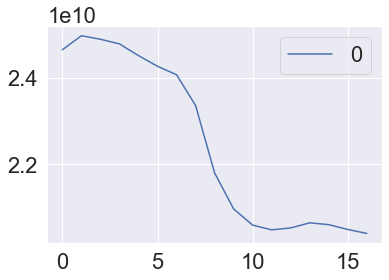

In [89]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [90]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [91]:
line = np.linspace(1, 1024, 1024).reshape(-1, 1) ## 데이터셋에 따라 변동

reg = KNeighborsRegressor(n_neighbors=17, weights='distance')
reg.fit(X_train, Y_train)
standard = reg.predict(line)
print(standard)

[3.45394118e+10 2.47552941e+10 2.47552941e+10 ... 2.47194118e+10
 2.70423529e+10 2.47600000e+10]


# 5. 검증

### 5-1. 상한/하한 임계치 추출

In [92]:
# 표준 데이터의 표준편차 추출
sigma = np.std(standard)
print(sigma) ## 표준편차 확인

2905968748.2285123


In [93]:
#하한 임계치 , 상한 임계치 생성
min_standard = standard - 3 * sigma
max_standard = standard + 3 * sigma

In [94]:
# y_test 길이만큼 최소 임계치 반복
min_standard_list = []
j = 0
for i in range(len(Y_test)):
    min_standard_list.append(min_standard[j])
    j += 1
    if j == len(min_standard):
        j = 0 # j 초기화
len(min_standard_list)

73472

In [95]:
max_standard_list = []
j = 0

for i in range(len(Y_test)):
    max_standard_list.append(max_standard[j])
    j += 1
    if j == len(max_standard):
        j = 0 # j 초기화

len(max_standard_list)

73472

In [96]:
standard_list = []
j = 0

for i in range(len(Y_test)):
    standard_list.append(standard[j])
    j += 1
    if j == len(standard):
        j = 0 # j 초기화
        
len(Y_test)

73472

In [97]:
df2 = pd.DataFrame({'real_y':Y_test, 'standard': standard_list,
                       'min_standard':min_standard_list,
                        'max_standard':max_standard_list
                   })

df2

,real_y,standard,min_standard,max_standard
0,0.000000e+00,3.453941e+10,2.582151e+10,4.325732e+10
1,0.000000e+00,2.475529e+10,1.603739e+10,3.347320e+10
2,0.000000e+00,2.475529e+10,1.603739e+10,3.347320e+10
3,0.000000e+00,2.475529e+10,1.603739e+10,3.347320e+10
4,0.000000e+00,2.959353e+10,2.087562e+10,3.831144e+10
...,...,...,...,...
73467,4.478000e+10,2.708353e+10,1.836562e+10,3.580144e+10
73468,4.478000e+10,2.467235e+10,1.595445e+10,3.339026e+10
73469,4.478000e+10,2.660059e+10,1.788268e+10,3.531849e+10
73470,4.478000e+10,2.708353e+10,1.836562e+10,3.580144e+10


### 5-2. 예측

In [98]:
# 하한, 상한 임계치를 Y_test 값과 비교하여 예측 품질 컬럼 추가
pred_fault = []
for i in range(len(df2)):
    if df2['real_y'][i] >= df2['max_standard'][i] or df2['real_y'][i] <= df2['min_standard'][i]:
        pred_fault.append(1)
    else:
        pred_fault.append(0)

In [99]:
real_fault = []
for i in range(len(df2)):
    if df['2_2_Result'][293888+i] == 'F': ## 값변경
        real_fault.append(1)
    else:
        real_fault.append(0)

In [100]:
df2['pred_fault'] = pred_fault
df2['real_fault'] = real_fault
df2

,real_y,standard,min_standard,max_standard,pred_fault,real_fault
0,0.000000e+00,3.453941e+10,2.582151e+10,4.325732e+10,1,1
1,0.000000e+00,2.475529e+10,1.603739e+10,3.347320e+10,1,1
2,0.000000e+00,2.475529e+10,1.603739e+10,3.347320e+10,1,1
3,0.000000e+00,2.475529e+10,1.603739e+10,3.347320e+10,1,1
4,0.000000e+00,2.959353e+10,2.087562e+10,3.831144e+10,1,1
...,...,...,...,...,...,...
73467,4.478000e+10,2.708353e+10,1.836562e+10,3.580144e+10,1,0
73468,4.478000e+10,2.467235e+10,1.595445e+10,3.339026e+10,1,0
73469,4.478000e+10,2.660059e+10,1.788268e+10,3.531849e+10,1,0
73470,4.478000e+10,2.708353e+10,1.836562e+10,3.580144e+10,1,0


### 5-3. 예측 결과 시각화

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set(font_scale=2)

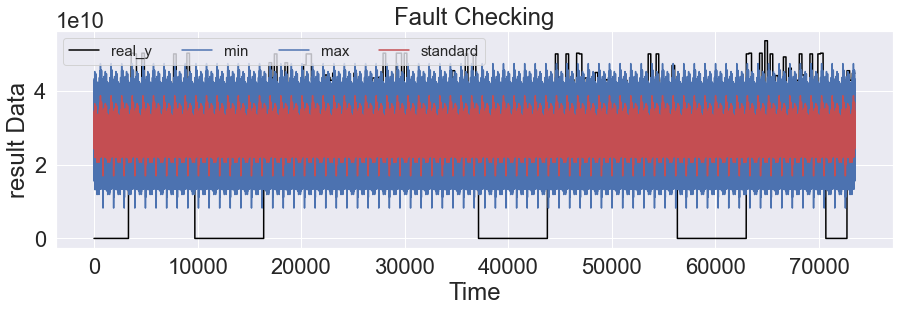

In [101]:
plt.figure(figsize=(15,4))

plt.plot(df2['real_y'], 'black', label='real_y')
plt.plot(df2['min_standard'], 'b', label='min')
plt.plot(df2['max_standard'], 'b', label='max')
plt.plot(df2['standard'], 'r', label='standard')

plt.xlabel('Time')
plt.ylabel('result Data')
plt.title('Fault Checking')

plt.legend(loc='best', ncol=4, fontsize=15)
plt.show()

### 5-4. 모델 평가

In [102]:
print('정밀도 : ', round(precision_score(df2['real_fault'], df2['pred_fault']), 2) * 100, '% 입니다.')
print('정확도 : ', round(accuracy_score(df2['real_fault'], df2['pred_fault']), 2) * 100, '% 입니다.')
print('재현율 : ', round(recall_score(df2['real_fault'], df2['pred_fault']), 2) * 100, '% 입니다.')
print('f1-score : ', round(f1_score(df2['real_fault'], df2['pred_fault']), 2) * 100, '% 입니다.')

정밀도 :  37.0 % 입니다.
정확도 :  40.0 % 입니다.
재현율 :  100.0 % 입니다.
f1-score :  54.0 % 입니다.


In [103]:
print(confusion_matrix(df2['real_fault'], df2['pred_fault'], labels=[1, 0]))
print(classification_report(df2['real_fault'], df2['pred_fault'], target_names=['정상', '불량']))

# 데이터 중 실제 불량인 경우 25344 + 0 = 25344
# 모델을 이용한 예측결과가 불량인 경우 25344 + 46331 = 71675

# 데이터 중 실제 양품인 경우 46331 + 1797 =  48128
# 모델을 이용한 예측결과가 양품인 경우 0 + 1797 = 1797

[[25344     0]
 [43833  4295]]
              precision    recall  f1-score   support

          정상       1.00      0.09      0.16     48128
          불량       0.37      1.00      0.54     25344

    accuracy                           0.40     73472
   macro avg       0.68      0.54      0.35     73472
weighted avg       0.78      0.40      0.29     73472



### 5-5. 모델 평가 시각화

In [104]:
arr = [[25344, 0],
        [43833, 4295]]

df_cm = pd.DataFrame(arr, index=[i for i in 'TF'], columns = [i for i in 'TF'])
df_cm

,T,F
T,25344,0
F,43833,4295


<AxesSubplot:title={'center':'confusion matrix without normalization'}>

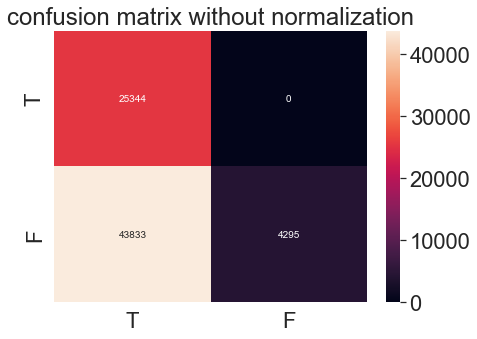

In [105]:
plt.figure(figsize=(7,5))
plt.title('confusion matrix without normalization')
sns.heatmap(df_cm, annot=True, fmt='d')

### 5-6. 모델 성능 비교

In [ ]:
predict = 0
real = 0

for i in range(len(df2)):
    if df2['real_fault'][i] == 1:
        real += 1
    else:
        real = real
        
for j in range(len(df2)):
    if df2['pred_fault'][j] == 1 and df2['real_fault'][j] == 1:
        predict += 1
    else:
        predict = predict
        
print('실제 불량 횟수 : ', real)
print('표준데이터를 이용한 불량 검출 횟수 : ', predict)
print('실제 불량 중 표준데이터를 이용하여 불량을 정확히 검출한 비율 : ', round(recall_score(df2['real_fault'], df2['pred_fault']), 2) * 100, '%')

In [ ]:
mean_data = df2['real_y'].mean()
print(mean_data)

In [ ]:
mean_pred = []
for a in range(len(df2)):
    if df2['real_y'][a] > mean_data:
        mean_pred.append(1)
    else:
        mean_pred.append(0)
df2['mean_fault'] = mean_pred

df2

# print(44780000000.0 > 1.6500000000000244e+36)

In [ ]:
predict = 0
real = 0

for i in range(len(df2)):
    if df2['real_fault'][i] == 1:
        real += 1
    else:
        real = real
        
for j in range(len(df2)):
    if df2['mean_fault'][j] == 1 and df2['real_fault'][j] == 1:
        predict += 1
    else:
        predict = predict
        
df2['mean_fault'] = mean_pred
print('실제 불량 횟수 : ', real)
print('표준데이터를 이용한 불량 검출 횟수 : ', predict)
print('실제 불량 중 표준데이터를 이용하여 불량을 정확히 검출한 비율 : ', 
      round(recall_score(df2['real_fault'], df2['mean_fault']), 2) * 100, '%')

In [ ]:
mean_pred = []
for a in range(len(df2)):
    if df2['real_y'][a] < mean_data:
        mean_pred.append(1)
    else:
        mean_pred.append(0)
df2['mean_fault'] = mean_pred

df2

In [ ]:
predict = 0
real = 0

for i in range(len(df2)):
    if df2['real_fault'][i] == 1:
        real += 1
    else:
        real = real
        
for j in range(len(df2)):
    if df2['mean_fault'][j] == 1 and df2['real_fault'][j] == 1:
        predict += 1
    else:
        predict = predict
        
df2['mean_fault'] = mean_pred
print('실제 불량 횟수 : ', real)
print('표준데이터를 이용한 불량 검출 횟수 : ', predict)
print('실제 불량 중 표준데이터를 이용하여 불량을 정확히 검출한 비율 : ', round(recall_score(df2['real_fault'], df2['mean_fault']), 2) * 100, '%')